# Part 9 - Transfer learning - CNN image classification

We apply image classification using the DenseNet121 model to predict the race of three different dogs

In this exercise we are going to implement transfer learning to predict the race of three different dogs.

For this purpose, we are going to use Keras and a pretrained DenseNet of 121 layers.

Yet again, we begin by importing everything we need.

Numpy for miscellaneous operations, Keras image functions, image preprocessing functions needed for inference, matplotlib to look at our images and os for image file loading.

In [1]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, smart_resize
from keras.applications.densenet import preprocess_input, decode_predictions, DenseNet121
import matplotlib.pyplot as plt
import os

## Data preparation

DenseNet121 was trained on the ImageNet dataset. ImageNet images are of size 224 * 224 and 3 color channels. For that reason we also need to cut and resize our images in these dimensions in order to put them through the network.

Our dataset lies in the `Project B` folder, with the images of each dog in a different directory.

We also set the image resizing dimensions.

In [2]:
data_dir = 'Project B/'
size = (224, 224)

We load our images in a dictionary of dictionaries, where the top key contains images of the three different dogs, and the lower key contains the name of each image and its array values.

The image preprocessing goes as follows:
- we load our image
- we convert to a numpy array
- apply all neeeded preprocessing for input
- resize in the correct dimensions
- and add another dimension for the batch size

In [3]:
dog_imgs = {}
for dog in os.listdir(data_dir):
    imgs = {}
    for img in (os.listdir(data_dir + dog)):
        imgs[img] = np.expand_dims(
            smart_resize(
                preprocess_input(
                    img_to_array(
                        load_img(data_dir + dog + '/' + img))),
                size), 
            0)
    dog_imgs[dog] = imgs

Let's a look at what we've done. This is a picture of Ermis, after it has been preprocessed and resized.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


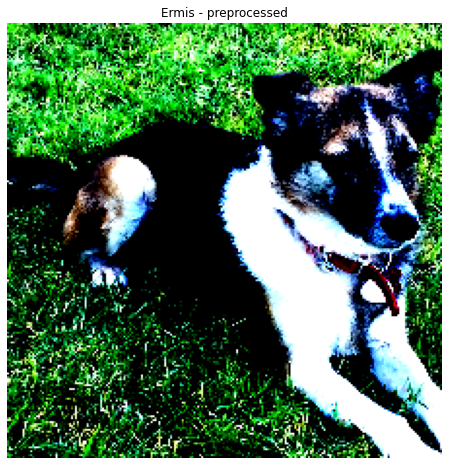

In [4]:
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(dog_imgs['Ermis']['Ermis2.JPG'][0])
plt.title('Ermis - preprocessed');

## Transfer learning evaluation

We load our model. As said, we are going to use the lightest DenseNet version of 121 layers.

We also take a look at its architecture.

In [5]:
model = DenseNet121()
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

Let's now make our predictions. We use the `decode_predictions` function to extract class names.

In [6]:
for dog in dog_imgs:
    for img, value in dog_imgs[dog].items():
        print(img + ":")
        for pred in decode_predictions(model.predict(value, 0))[0]:
            print(pred)
    print('')

Ermis1.jpg:
('n02106662', 'German_shepherd', 0.33648476)
('n02089973', 'English_foxhound', 0.10217928)
('n02088364', 'beagle', 0.099809624)
('n02089867', 'Walker_hound', 0.082490675)
('n02113186', 'Cardigan', 0.05121557)
Ermis2.JPG:
('n02106662', 'German_shepherd', 0.80622923)
('n02113186', 'Cardigan', 0.09179445)
('n02113023', 'Pembroke', 0.029215496)
('n02091467', 'Norwegian_elkhound', 0.014691314)
('n02106166', 'Border_collie', 0.010393875)
Ermis3.jpg:
('n02091467', 'Norwegian_elkhound', 0.26653445)
('n02090622', 'borzoi', 0.18992507)
('n02106030', 'collie', 0.053726055)
('n02106662', 'German_shepherd', 0.051984064)
('n02109525', 'Saint_Bernard', 0.047594335)

Fred1.jpg:
('n02110341', 'dalmatian', 0.3878652)
('n02100236', 'German_short-haired_pointer', 0.186916)
('n02109047', 'Great_Dane', 0.11449889)
('n02100735', 'English_setter', 0.08505225)
('n02088632', 'bluetick', 0.055454124)
Fred2.jpg:
('n02110341', 'dalmatian', 0.84617317)
('n02100735', 'English_setter', 0.07821894)
('n0210

The model seems to have performed decently.